# 1-Import Data

In [1]:
# import numpy as np
# import pandas as pd
# from ipywidgets import GridBox, Layout

import fileselector as fs
from importlib import reload
reload(fs)
fs.load_dependencies()
# Usage
# Replace '/your/start/directory/' with your actual start directory
Path='/home/coder/project/doric_fiberphotometry/Data/knob'

file_selector = fs.FileSelector(Path)
# file_name = file_selector.get_selected_file()


Dropdown(description='Select File:', options=('Select a file', '258_MCx_Knob_Nov17_HP_0000.doric', '258_NAc_kn…

Selected file: /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete.doric
loading dataset .....


GridBox(children=(Dropdown(description='Isos:', index=7, layout=Layout(height='100px', width='100%'), options=…

Button(description='Load Data', layout=Layout(display='none'), style=ButtonStyle())

Not all datasets were automatically selected, please review and select manually.
Datasets loaded.


ipympl is installed. You can proceed with %matplotlib ipympl.
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//raw_data_seperated.png


/home/coder/project/doric_fiberphotometry/dataexplorer.py:396: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/coder/project/doric_fiberphotometry/dataexplorer.py:408: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(save_path_input.value, dpi=300, bbox_inches='tight')


Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//raw_data_merged.png


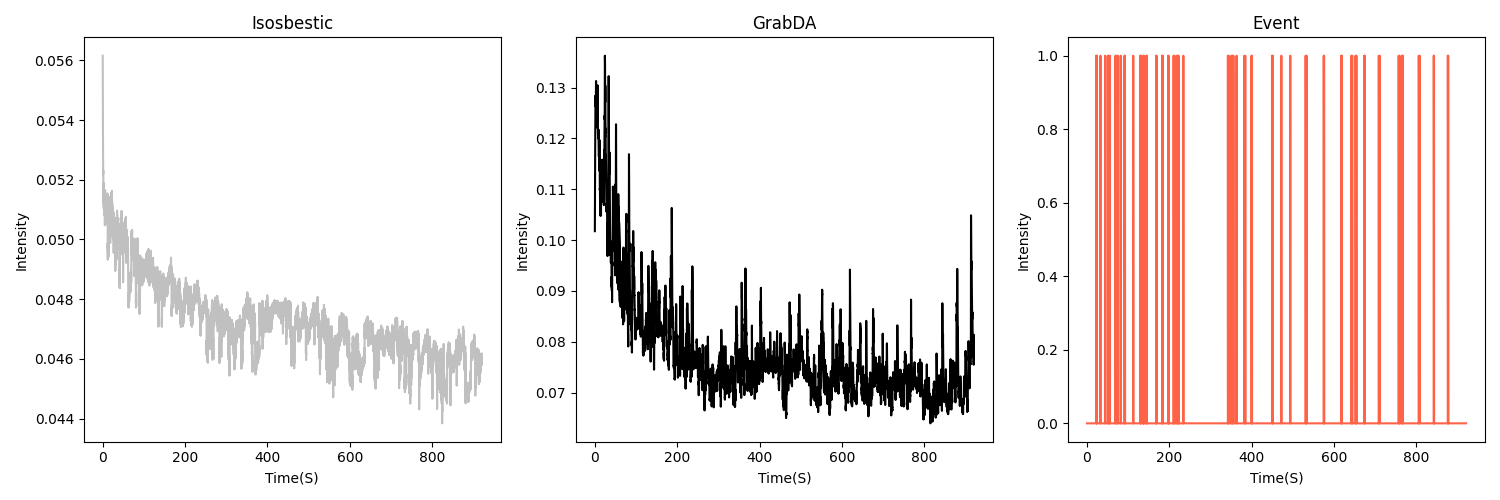

/usr/local/lib/python3.9/dist-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


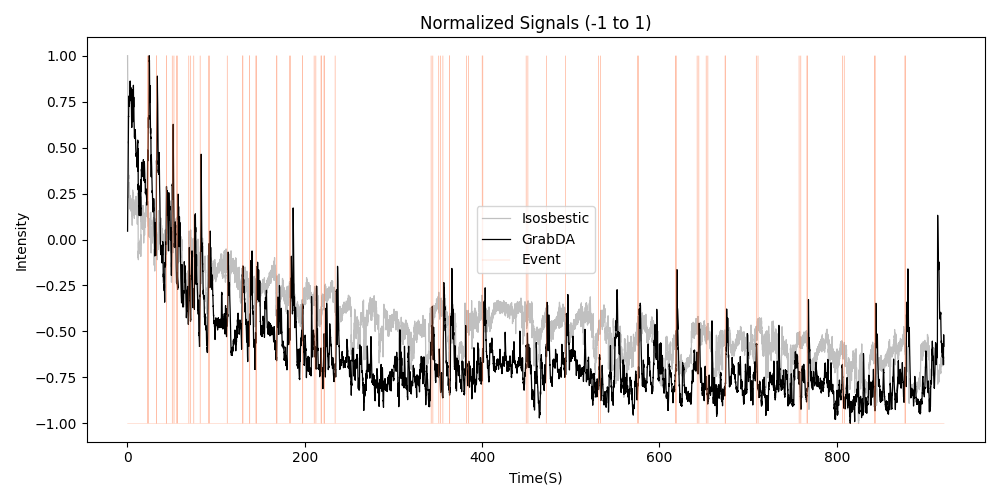

In [2]:
## After selecting datasets, the respective info will be displayed.
## Then, click "Load Data" button to load the datasets.
isos_df = file_selector.get_isos_df()
grabda_df = file_selector.get_grabda_df()
event_df = file_selector.get_event_df()

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import dataexplorer as de
from importlib import reload
try:
    import ipympl
    print("ipympl is installed. You can proceed with %matplotlib ipympl.")
    %matplotlib widget
except ImportError:
    print("ipympl is not installed. Please run !pip install ipympl.")
    %pip install ipympl
    %matplotlib widget


reload(de)

de.plot_and_save_seperated(isos_df, grabda_df, event_df,file_selector)

de.plot_and_save(isos_df,grabda_df,event_df,file_selector)



# Knob Events


In [3]:
import dataexplorer as de
from importlib import reload
import ipywidgets as widgets
from IPython.display import display
reload(de)

rising_edges = event_df['Data'].diff() == 1
rising_edge_df = event_df[rising_edges].reset_index().rename(columns={'index': 'Sample_Number'})
## Calculate the optimal time window
optimal_window = de.find_optimal_time_window(rising_edge_df,Event_type='Knob')
print("optimal window is :",optimal_window)
## Classify events in the rising_edge_df
# classified_events_df = de.classify_events(rising_edge_df,optimal_window,['Init','Success','Fail'])
classified_events_df = de.classify_events(rising_edge_df,optimal_window,Event_type='knob')

print(classified_events_df.head())
print("Event Number: ",len(classified_events_df))


optimal window is : 0.034
      Time     Type  Sample_Number
0  22.8200     Init       228200.0
1  23.3277  Success       233277.0
2  32.5229     Init       325229.0
3  32.6787  Success       326787.0
4  43.7436     Init       437436.0
Event Number:  81


In [30]:
classified_events_df.head(12)

,Time,Type,Sample_Number,Tag
0,22.8200,Init,228200.0,Init
1,23.3277,SAS,233277.0,SAS
2,32.5229,Init,325229.0,Init
3,32.6787,SAS,326787.0,SAS
4,43.7436,Init,437436.0,Init
5,43.8795,SAS,438795.0,SAS
6,50.3893,Init,503893.0,Init
7,52.4032,FAS,524032.0,FAS
8,55.7628,Init,557628.0,Init
9,55.8903,SAF,558903.0,SAF


# Data Prepration


##  Use function get_zdFF to calculate z-dF/F

Download photometry_functions.py file from [here](https://github.com/katemartian/Photometry_data_processing "source").

please cite Jove paper:

__Martianova, E., Aronson, S., Proulx, C.D.__ [Multi-Fiber Photometry to Record Neural Activity in Freely Moving Animal.](https://www.jove.com/video/60278/multi-fiber-photometry-to-record-neural-activity-freely-moving). _J. Vis. Exp._ (152), e60278, doi:10.3791/60278 (2019).

[refrence](https://colab.research.google.com/github/katemartian/Photometry_data_processing/blob/master/Photometry_data_processing.ipynb#scrollTo=Lak9o-Hn3QQW)


In [63]:
from importlib import reload
import photometry_functions as pf
reload(pf)
# Usage
def save_signal(zdff):
    global signal_df 
    signal_df = zdff
    
    print(signal_df.head())
analysis = pf.PhotometryAnalysis(isos_df,grabda_df,classified_events_df,save_signal)



IntText(value=10, description='Cutoff Freq:')

IntText(value=2000, description='remove(ms):')

FloatLogSlider(value=500000000000.0, description='lambd:', max=16.0, min=5.0)

IntText(value=10, description='porder:')

IntText(value=50, description='itermax:')

Button(description='Run Function', style=ButtonStyle())

Output()

/home/coder/project/doric_fiberphotometry/photometry_functions.py:73: RuntimeWarning: divide by zero encountered in divide
  reference = (reference - np.median(reference)) / np.std(reference)
/home/coder/project/doric_fiberphotometry/photometry_functions.py:73: RuntimeWarning: invalid value encountered in divide
  reference = (reference - np.median(reference)) / np.std(reference)


/home/coder/project/doric_fiberphotometry/photometry_functions.py:73: RuntimeWarning: divide by zero encountered in divide
  reference = (reference - np.median(reference)) / np.std(reference)
/home/coder/project/doric_fiberphotometry/photometry_functions.py:73: RuntimeWarning: invalid value encountered in divide
  reference = (reference - np.median(reference)) / np.std(reference)


# PSTH Prepration

## Cut and Center the Data

I need 4 types 

1-success after success (sas)
2-success after fail (saf)
3-fail after success (fas)
4-fail after fail (faf)



In [5]:
# Create a new column for the tags
classified_events_df['Tag'] = ''

# Initialize a variable to keep track of the previous type
prev_type = None

# Iterate through the DataFrame
for i in range(len(classified_events_df)):
    curr_type = classified_events_df.at[i, 'Type']
    
    # Tag all "Init" events as "Init"
    if curr_type == 'Init':
        tag = 'Init'
    else:
        # Calculate the tag for "Init" and "Fail" based on previous "Success" or "Fail" events
        if prev_type == 'Fail':
            if curr_type == 'Success':
                tag = 'SAF'
            else:
                tag = 'FAF'
        else:
            if curr_type == 'Success':
                tag = 'SAS'
            else:
                tag = 'FAS'
        # else:
        #     tag = 'NA'
        # Update prev_type for the next iteration
        prev_type = curr_type

    # Assign the tag to the current row
    classified_events_df.at[i, 'Tag'] = tag


    
classified_events_df['Type'] = classified_events_df['Tag']

# Display the updated DataFrame
print(classified_events_df)


        Time  Type  Sample_Number   Tag
0    22.8200  Init       228200.0  Init
1    23.3277   SAS       233277.0   SAS
2    32.5229  Init       325229.0  Init
3    32.6787   SAS       326787.0   SAS
4    43.7436  Init       437436.0  Init
..       ...   ...            ...   ...
76  808.2792   FAS      8082792.0   FAS
77  842.8103  Init      8428103.0  Init
78  843.1931   SAF      8431931.0   SAF
79  876.8726  Init      8768726.0  Init
80  877.6278   SAS      8776278.0   SAS

[81 rows x 4 columns]


In [ ]:
print(classified_events_df.Tag)

In [6]:
import photometry_functions as pf
from importlib import reload

reload(pf)

# Example usage:
time_window = (-5, 10)  # For example, 2 seconds before and after the event


event_type = "Init"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Init = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Init.head())

event_type = "FAF"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_FAF = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_FAF.head())

event_type = "FAS"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_FAS = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_FAS.head())

event_type = "SAF"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_SAF = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_SAF.head())

event_type = "SAS"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_SAS = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_SAS.head())

 

            Time      Data
Event Row                 
1     1772 -5.00  3.677437
      1773 -4.99  3.686882
      1774 -4.98  3.696249
      1775 -4.97  3.705394
      1776 -4.96  3.714161
             Time      Data
Event Row                  
1     20739 -5.00  1.133781
      20740 -4.99  1.173313
      20741 -4.98  1.208189
      20742 -4.97  1.238282
      20743 -4.96  1.263545
            Time      Data
Event Row                 
1     4730 -5.00  3.036657
      4731 -4.99  3.035892
      4732 -4.98  3.033787
      4733 -4.97  3.030446
      4734 -4.96  3.025986
            Time      Data
Event Row                 
1     5079 -5.00  3.061751
      5080 -4.99  3.062705
      5081 -4.98  3.065956
      5082 -4.97  3.071532
      5083 -4.96  3.079430
            Time      Data
Event Row                 
1     1823 -5.00  3.492526
      1824 -4.99  3.506049
      1825 -4.98  3.519486
      1826 -4.97  3.532642
      1827 -4.96  3.545343


## Plot Dataset

### Plot all Signals 

In [ ]:
import os
# Plot All signals
y_min = -2
y_max = 4

import photometry_functions as pf
from importlib import reload
reload(pf)





# Init:
fig = plt
pf.plot_cut_signals(centralized_signals_df_Init,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_Inits.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# FAF:
fig = plt
pf.plot_cut_signals(centralized_signals_df_FAF,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_FAF.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# FAS:
fig = plt
pf.plot_cut_signals(centralized_signals_df_FAS,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_FAS.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# FAS:
fig = plt
pf.plot_cut_signals(centralized_signals_df_FAS,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_FAS.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# SAS:
fig = plt
pf.plot_cut_signals(centralized_signals_df_SAS,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_SAS.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")



### Plot Signals seperatly

In [ ]:
y_max=5
y_min=-2

import photometry_functions as pf
from importlib import reload

reload(pf)

# Init
pf.plot_cut_signals_seperated(centralized_signals_df_Init,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Init_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Success
pf.plot_cut_signals_seperated(centralized_signals_df_Success,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Success_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Fail
pf.plot_cut_signals_seperated(centralized_signals_df_Fail,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Fail_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

### Plot and Select Signals for PSTH

In [7]:

import photometry_functions as pf
from importlib import reload
import os

reload(pf)

# Example usage:

def handle_filtered_data(df,event_type):
    # Handle the filtered DataFrame here, e.g., save it to a global variable or process it further
    if event_type == 'Init':    
        global filtered_signal_df_Init
        filtered_signal_df_Init = df
        print(filtered_signal_df_Init.head())
    
    if event_type == 'FAF':    
        global filtered_signal_df_FAF
        filtered_signal_df_FAF = df
        print(filtered_signal_df_FAF.head())
    
    if event_type == 'FAS':    
        global filtered_signal_df_FAS
        filtered_signal_df_FAS = df
        print(filtered_signal_df_FAS.head())
    
    if event_type == 'SAF':    
        global filtered_signal_df_SAF
        filtered_signal_df_SAF = df
        print(filtered_signal_df_SAF.head())
    
    if event_type == 'SAS':    
        global filtered_signal_df_SAS
        filtered_signal_df_SAS = df
        print(filtered_signal_df_SAS.head())
    
    
    fig = plt
    filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Selected_Stim_Events_'+event_type+'.png'

    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Figure saved as {filename}")



# Init:
explorer = pf.SignalExplorer(centralized_signals_df_Init,'Init', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# FAF:
explorer = pf.SignalExplorer(centralized_signals_df_FAF,'FAF', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# FAS:
explorer = pf.SignalExplorer(centralized_signals_df_FAS,'FAS', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# SAF:
explorer = pf.SignalExplorer(centralized_signals_df_SAF,'SAF', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# SAS:
explorer = pf.SignalExplorer(centralized_signals_df_SAS,'SAS', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction


GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

Filtered data is ready.
            Time      Data
Event Row                 
1     1772 -5.00  3.677437
      1773 -4.99  3.686882
      1774 -4.98  3.696249
      1775 -4.97  3.705394
      1776 -4.96  3.714161
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//Selected_Stim_Events_Init.png


Filtered data is ready.
             Time      Data
Event Row                  
1     20739 -5.00  1.133781
      20740 -4.99  1.173313
      20741 -4.98  1.208189
      20742 -4.97  1.238282
      20743 -4.96  1.263545
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//Selected_Stim_Events_FAF.png


Filtered data is ready.
            Time      Data
Event Row                 
1     4730 -5.00  3.036657
      4731 -4.99  3.035892
      4732 -4.98  3.033787
      4733 -4.97  3.030446
      4734 -4.96  3.025986
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//Selected_Stim_Events_FAS.png


Filtered data is ready.
            Time      Data
Event Row                 
1     5079 -5.00  3.061751
      5080 -4.99  3.062705
      5081 -4.98  3.065956
      5082 -4.97  3.071532
      5083 -4.96  3.079430
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//Selected_Stim_Events_SAF.png


Filtered data is ready.
            Time      Data
Event Row                 
1     1823 -5.00  3.492526
      1824 -4.99  3.506049
      1825 -4.98  3.519486
      1826 -4.97  3.532642
      1827 -4.96  3.545343
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//Selected_Stim_Events_SAS.png


## Normalization

In [8]:
import photometry_functions as pf
from importlib import reload

reload(pf)


# Init:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
# normalized_signal_df_Init = pf.normalize_signal(filtered_signal_df_Init, column='Data')
normalized_signal_df_Init = filtered_signal_df_Init

# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_FAF = filtered_signal_df_FAF
normalized_signal_df_FAS = filtered_signal_df_FAS
normalized_signal_df_SAF = filtered_signal_df_SAF
normalized_signal_df_SAS = filtered_signal_df_SAS


# Analyze Resaults

**We need to have three time window: motor planing window, motor execution window, motor outcome window**

## PSTH 

[-6. -4. -2.  0.  2.  4.  6.  8. 10. 12.]
[-6.   -4.   -2.    0.    1.65  2.    4.    6.    8.   10.   12.  ]
[-6.   -4.   -2.    0.    1.02  1.65  2.    4.    6.    8.   10.   12.  ]
[-6.   -4.   -2.    0.    1.02  1.65  2.    4.    6.    8.   10.   12.  ]


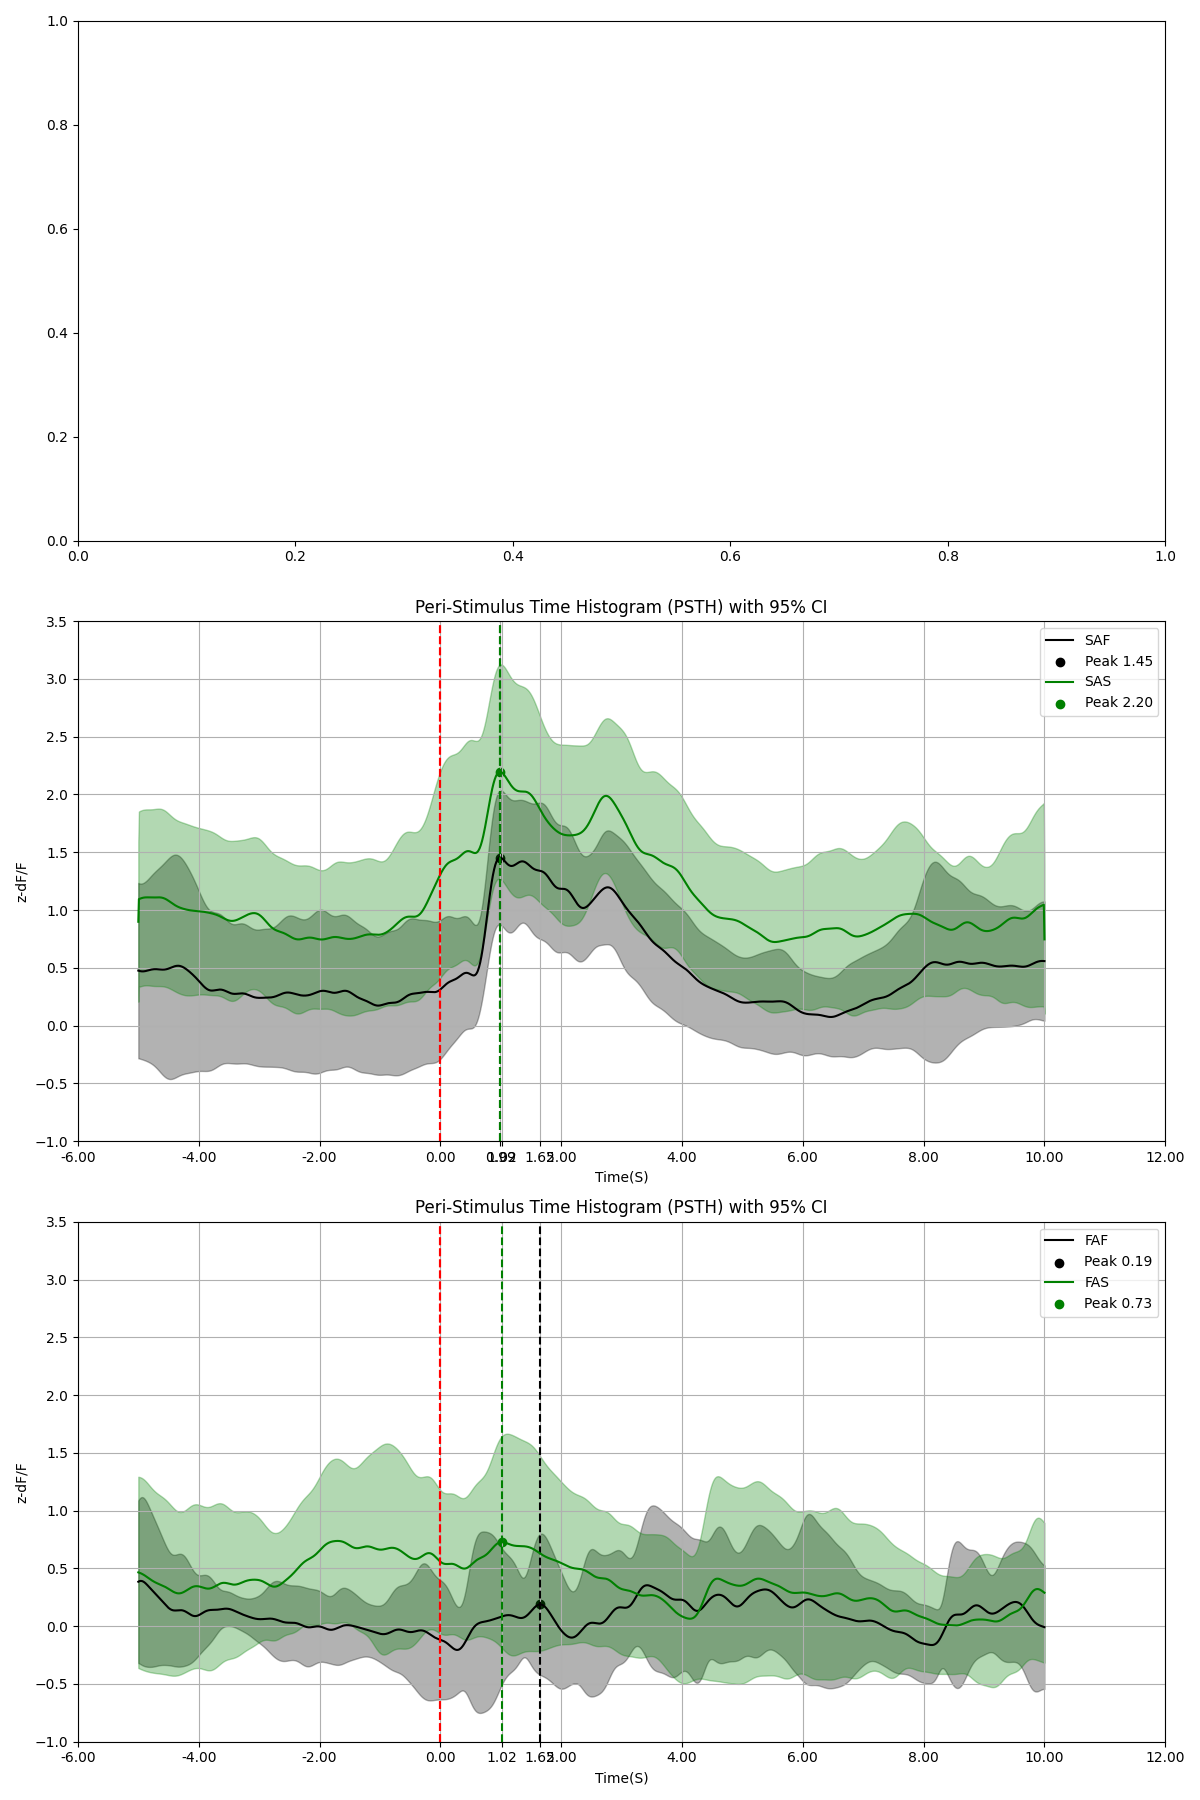

Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs/PSTH.svg


In [11]:
import photometry_functions as pf
import os
from importlib import reload

reload(pf)
min=-1
max=3.5

PSTH_df_ci_FAF = pf.create_psth_with_ci(normalized_signal_df_FAF)
PSTH_df_ci_FAS = pf.create_psth_with_ci(normalized_signal_df_FAS)
PSTH_df_ci_SAF = pf.create_psth_with_ci(normalized_signal_df_SAF)
PSTH_df_ci_SAS = pf.create_psth_with_ci(normalized_signal_df_SAS)


# Create a figure and a 3x1 grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


pf.plot_psth(PSTH_df_ci_FAF, min, max,'black','FAF',pos=axs[2])
pf.plot_psth(PSTH_df_ci_FAS, min, max,'green','FAS',pos=axs[2])
pf.plot_psth(PSTH_df_ci_SAF, min, max,'black','SAF',pos=axs[1])
pf.plot_psth(PSTH_df_ci_SAS, min, max,'green','SAS',pos=axs[1])


plt.tight_layout()

plt.show()

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'PSTH.svg'


directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, format='svg', dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")


## HeatMap

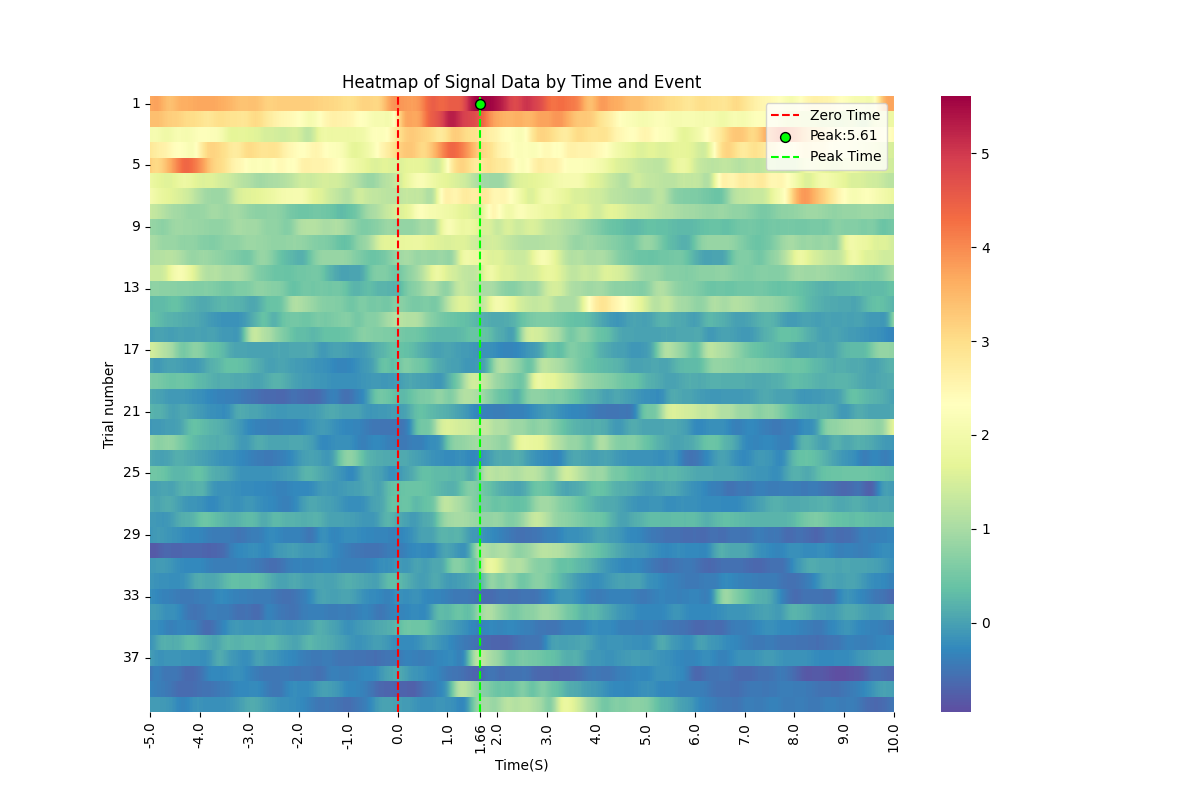

Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr25_0000_153852396_incomplete/Figs//Heatmap_init.svg


NameError: name 'normalized_signal_df_Fail' is not defined

In [12]:
import photometry_functions as pf
import os
from importlib import reload

reload(pf)

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_init.svg'
directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)


pf.heatmap_plot(normalized_signal_df_Init)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_Fail.svg'
pf.heatmap_plot(normalized_signal_df_Fail)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_Success.svg'
pf.heatmap_plot(normalized_signal_df_Success)
plt.savefig(filename, format='svg', dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")


### Area Under Curves 

In [ ]:
import photometry_functions as pf
import fileselector as fs
import os
from importlib import reload
reload(fs)
reload(pf)
fs.load_dependencies()

# Success
plt.figure(figsize=(12, 6))

pf.plot_psth_auc(PSTH_df_std_Success,-2, 3.5,'green','Stim')
plt.show()
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Success.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

pf.plot_auc_bars_with_duration(PSTH_df_std_Success,-1.5, 1.5,(-2,0),(0,5))
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Bars_Success.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Fail
plt.figure(figsize=(12, 6))

pf.plot_psth_auc(PSTH_df_std_Fail,-2, 3.5,'green','Stim')
plt.show()
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Fail.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

pf.plot_auc_bars_with_duration(PSTH_df_std_Fail,-1.5, 1.5,(-2,0),(0,5))
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Bars_Fail.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")



# saving all the Dataframes as CSV

In [ ]:
import pandas as pd
import datetime

def save_dataframes_to_csv():
    # Fetch the current datetime to append to file names to avoid overwriting
    now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = file_selector.file_path.split('.')[0]+'/Data/'+'test.csv"'
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    # Loop through all global variables
    for var_name, value in list(globals().items()):
        # Check if the value is an instance of pd.DataFrame
        if isinstance(value, pd.DataFrame):
            # Construct filename with a timestamp to prevent overwriting
            file = f"{var_name}_{now}.csv"
            filename = file_selector.file_path.split('.')[0]+'/Data/'+file

            # Save the DataFrame to a CSV file
            value.to_csv(filename, index=False)
            print(f"Saved {filename}")


# Call the function to save all DataFrames
save_dataframes_to_csv()


# reloading saved data

In [ ]:
import pandas as pd

def load_dataframe_from_csv(file_path):
    """
    Loads a DataFrame from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file to be loaded.

    Returns:
    pandas.DataFrame: The DataFrame containing the data from the CSV file.
    """
    # Loading the DataFrame from the specified CSV file
    df = pd.read_csv(file_path)
    
    return df

# Example usage:
# Replace 'your_file.csv' with the path to the CSV file you want to load

csv_file_path = 'your_file.csv'
df = load_dataframe_from_csv(csv_file_path)
# Optionally, you can display the first few rows of the loaded DataFrame


In [ ]:
centralized_signals_df_Init


In [ ]:
import pandas as pd
import datetime
# Assuming centralized_signals_df_Init is your DataFrame

# If 'Event' is part of a MultiIndex, reset the index
if isinstance(centralized_signals_df_Init.index, pd.MultiIndex):
    centralized_signals_df_Init.reset_index(inplace=True)

# Filter the DataFrame for the base data at Time 0
# base_df = centralized_signals_df_Init[centralized_signals_df_Init['Time'] == 0]
# Filter the dataframe for the time range first
base_df = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= -4) & (centralized_signals_df_Init['Time'] <= -2)]



base_df = base_df.groupby('Event')['Data'].mean().reset_index()
base_df.rename(columns={'Data': 'F_Init'}, inplace=True)

# Filter the DataFrame for Time values between 0 and 2
filtered_df = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= 0) & (centralized_signals_df_Init['Time'] <= 2)]

# Group by 'Event' and find the maximum 'Data' value in each group
max_df = filtered_df.groupby('Event')['Data'].max().reset_index()
max_df.rename(columns={'Data': 'F_Max'}, inplace=True)

# Merge the base data and MaxdFF
result_df = pd.merge(base_df, max_df, on='Event', how='left')

# Calculate the difference between 'Max Data' and 'Base'
result_df['dFF'] = result_df['F_Max'] - result_df['F_Init']

# Calculate Init_Speed and Av_Speed
# Define time intervals for Init_Speed and Av_Speed calculations
init_interval_df = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= 0) & (centralized_signals_df_Init['Time'] <= 0.1)]
av_interval_df = filtered_df  # already filtered from 0 to 2

# Group by 'Event' and calculate min and max 'Data' for Init_Speed
init_speed_calc = init_interval_df.groupby('Event')['Data'].agg(['min', 'max'])
init_speed_calc['F_Init_Speed'] = (init_speed_calc['max'] - init_speed_calc['min']) / 0.1

# Group by 'Event' and calculate min and max 'Data' for Av_Speed
av_speed_calc = av_interval_df.groupby('Event')['Data'].agg(['min', 'max'])
av_speed_calc['F_Av_Speed'] = (av_speed_calc['max'] - av_speed_calc['min']) / 2

# Merge these calculations into the result_df
result_df = result_df.merge(init_speed_calc[['F_Init_Speed']], on='Event', how='left')
result_df = result_df.merge(av_speed_calc[['F_Av_Speed']], on='Event', how='left')

# Save to CSV
now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
file = f"result_data_{now}.csv"
result_df.to_csv(file, index=False)
result_df.to_csv('result_data.csv', index=False)

# Print confirmation
print(f"The result has been saved to '{file}'.")


In [ ]:
import pandas as pd

# Simulating the creation of your initial DataFrame
data = {
    "Event": [1, 1, 1, 1, 1],
    "Row": [617, 618, 619, 620, 621],
    "Time": [-4.00, -3.99, -3.98, -3.97, -3.96],
    "Data": [0.330067, 0.341075, 0.356469, 0.363225, 0.341833]
}
centralized_signals_df_Init = pd.DataFrame(data)

# Define the time intervals
init_interval = (0, 0.1)
av_interval = (0, 2)

# Filter the DataFrame for the initial interval and calculate Init_Speed
init_data = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= init_interval[0]) & (centralized_signals_df_Init['Time'] <= init_interval[1])]
if not init_data.empty:
    init_speed = (init_data['Data'].max() - init_data['Data'].min()) / (init_data['Time'].max() - init_data['Time'].min())
else:
    init_speed = 0

# Filter the DataFrame for the average interval and calculate Av_Speed
av_data = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= av_interval[0]) & (centralized_signals_df_Init['Time'] <= av_interval[1])]
if not av_data.empty:
    av_speed = (av_data['Data'].max() - av_data['Data'].min()) / (av_data['Time'].max() - av_data['Time'].min())
else:
    av_speed = 0

# Assuming result_df exists and we can add columns to it
result_df['Init_Speed'] = init_speed
result_df['Av_Speed'] = av_speed

print(result_df)


In [ ]:
import pandas as pd

# Assuming centralized_signals_df_Init is your DataFrame

# Reset index if 'Event' is part of a MultiIndex
if isinstance(centralized_signals_df_Init.index, pd.MultiIndex):
    centralized_signals_df_Init.reset_index(inplace=True)

# Define function to calculate speed
def calculate_speed(df, start_time, end_time):
    # Filter data within the specified time range
    time_filtered = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]
    if time_filtered.empty:
        return float('nan')  # Return NaN if no data in the specified range
    else:
        # Calculate max and min data values
        max_value = time_filtered['Data'].max()
        min_value = time_filtered['Data'].min()
        # Calculate dt
        dt = end_time - start_time
        # Calculate speed
        return (max_value - min_value) / dt

result_df['Init_Speed'] = calculate_speed(centralized_signals_df_Init, 0, 0.1)
result_df['Av_Speed'] = calculate_speed(centralized_signals_df_Init, 0, 2)

# Save to CSV
result_df.to_csv('result_data_with_speeds.csv', index=False)

# Print confirmation
print("The result, including 'Init_Speed' and 'Av_Speed', has been saved to 'result_data_with_speeds.csv'.")
